# Final Notebook
**Group 55:** Isabel Knight, Tabish Nusrat, Niam Noaman


<img src="https://i.imgur.com/jCM1plg.jpg" width=288 height=384 />

# Introduction and the Metric
For our project, we are evaluating what the best neighborhood in Pittsburgh is based off our group's metric; what is the best neighborhood to live in if you want to be a dog owner? Since dogs are the best, the neighborhood best suited for a dog owner and their dog can be considered the best neighborhood in Pittsburgh. The submetrics our group used were the walkability scores of the neighborhoods in Pittsburgh, the dog licenses in Pittsburgh, and how many parks are in each neighborhood of Pittsburgh. We'd first found the dataset of the dog licenses in Pittsburgh, and later found multiple other datasets that went well with the idea of a neighborhood that would be good for a dog to live in. We decided to go with that as our metric since we had a clear idea of what direction to head in from there.


# The Best Neighborhood
## Submetric: Pittsburgh Parks

For my metric, I looked at the parks in Pittsburgh. To determine the best neighborhood to be a dog owner in, we will be considering the number of parks in each neighborhood. 

Having multiple parks around helps to keep your dog happy and stimulated on walks, and it will provide them with plenty of space to run around in and explore during playtime. If a neighborhood has *enough* parks or is close to another neighborhood with many parks, if it's the best choice considering the metrics chosen by the other groupmates, it would still be considered a good choice even if it's not the one with the *most* parks, since parks aren't the only factor we'll be considering in deciding what the best neighborhood in Pittsburgh is.

### Data and Code

I started by importing the necessary packages and reading in the data for all of the parks in Pittsburgh. 

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_csv("parks.csv", header=0)
data.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


The above is what the data initially looked like. I then grouped the data by neighborhood and used the `count()` function to count the number of values that fall within each data type for each neighborhood.

In [3]:
nbr_data = data.groupby("neighborhood").count()
nbr_data

,id,name,type,maintenance_responsibility,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,
Allegheny Center,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Allentown,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Arlington,1,1,1,1,0,1,1,1,1,1,1,1,1,1
Banksville,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Bedford Dwellings,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,3,3,3,3,2,3,3,3,3,3,3,3,3,3
West End,2,2,2,2,0,2,2,2,2,2,2,2,2,2
West Oakland,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Though this data is better, it doesn't narrow anything down and it's still a long list. Note that the values for `id` and `name` are all the same for each neighborhood. There are other values that are the same as well, but these three are the easiest to narrow the data down by because the idea is simpler to understand intuitively. Each park will have its own unique name and its own unique ID. So by finding how many of these values there are for each neighborhood, we are also counting the *the number of parks* in each neighborhood.

Taking this into consideration, I filtered out every neighborhood that has less than 3 parks in it, using a function similar to the one we used in one of the lectures. The data is now much easier to read and has been narrowed down conveniently.

In [36]:
def findLarge(groups, threshold):
    if(len(groups) < threshold):
        return False
    else:
        return True
    
most_parks = data.groupby("neighborhood").filter(findLarge, threshold=3)
most_parks = most_parks.groupby("neighborhood").count()
most_parks

,id,name,type,maintenance_responsibility,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,
Beechview,8,8,8,8,3,8,8,8,8,8,8,8,8,8
Beltzhoover,3,3,3,3,1,3,3,3,3,3,3,3,3,3
Bloomfield,3,3,3,3,2,3,3,3,3,3,3,3,3,3
Brighton Heights,4,4,4,4,2,4,4,4,4,4,4,4,4,4
Brookline,3,3,3,3,0,3,3,3,3,3,3,3,3,3
Carrick,3,3,3,3,0,3,3,3,3,3,3,3,3,3
Central Business District,10,10,10,10,4,10,10,10,10,10,10,10,10,10
Central Northside,3,3,3,3,2,3,3,3,3,3,3,3,3,3
Central Oakland,4,4,4,4,2,4,4,4,4,4,4,4,4,4


To make the table less convoluted, I picked one of the columns to keep displayed and essentially cropped the others out. Now the table is simple and easy to understand.

In [37]:
most_parks_sorted = most_parks.iloc[:, 1:2]
most_parks_sorted

,name
neighborhood,
Beechview,8
Beltzhoover,3
Bloomfield,3
Brighton Heights,4
Brookline,3
Carrick,3
Central Business District,10
Central Northside,3
Central Oakland,4


For the final touch to the table, I renamed the column to "Number of Parks" so readers can more simply understand the table, without having to understand why or how the number was reached if they want to avoid confusion. I also sorted the table by the number of parks in ascending order, rather than sorting it by the neighborhood names alphabetically, since that is the focus of the table.

In [38]:
most_parks_sorted = most_parks_sorted.sort_values(by="name")
most_parks_sorted = most_parks_sorted.rename(columns={"name":"Number of Parks"})
most_parks_sorted

,Number of Parks
neighborhood,
Lincoln-Lemington-Belmar,3
Swisshelm Park,3
Spring Hill-City View,3
Point Breeze North,3
North Shore,3
Manchester,3
Lower Lawrenceville,3
Upper Lawrenceville,3
Larimer,3


Finally, I created a bar graph to plot the data out in a manner that is easier to understand visually. Albeit a little crowded, the graph does its job.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9652a1e550>],
      dtype=object)

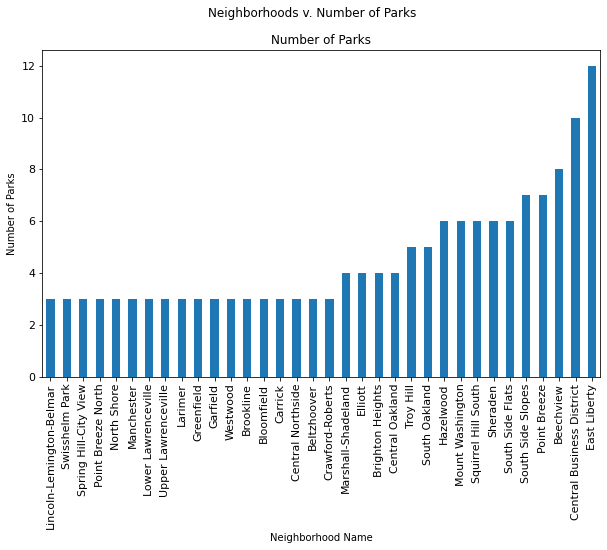

In [39]:
most_parks_sorted.plot(kind="bar", title="Neighborhoods v. Number of Parks", subplots=True,
                xlabel="Neighborhood Name", ylabel="Number of Parks", legend = False, figsize=(10, 6), fontsize=11)

This next section of the code shows the above data in map form, with each neighborhood being coloured correspondingly to its respective number of parks. This helps to see which neighborhoods are adjacent to the ones with many parks for later analysis. 

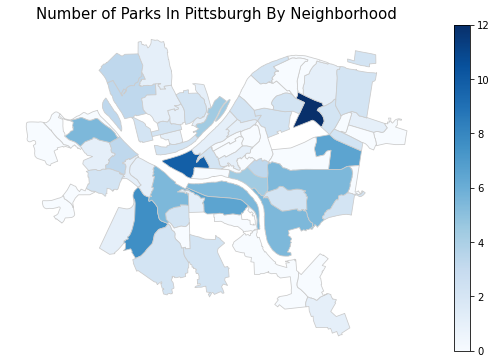

In [42]:
nbr = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
mapdata = data.groupby("neighborhood").count()
merge = nbr.set_index("hood").join(mapdata.set_index("name"))
merge['num_parks'] = mapdata.name

fig, ax = plt.subplots(1, figsize=(10, 6))

merge.plot(column="num_parks", cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

#customize map by adding title, legend, etc.
ax.axis("off")
ax.set_title("Number of Parks In Pittsburgh By Neighborhood", fontdict={"fontsize": "15", "fontweight" : "2"})
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=12))
sm._A = []
cbar = fig.colorbar(sm)

### Conclusion

The neighborhood with the most parks is **East Liberty** with 12 parks, followed by **Central Business District** with 10 parks. **Beechview** is next with 8 parks, but there are two other neighborhoods with 7 parks and multiple neighborhoods with 6 parks, so it's not quite as separated from the rest of the data compared to East Liberty and Central Business District. There are a total of **34 neighborhoods** that contain three or more parks in them. While the best choices would be East Liberty and Central Business District, any of these 34 neighborhoods would still be great choices for dog owners to live in.

## Submetric: Dogs per Neighborhood
 
 The WPRDC has a record of all dog licenses in Allegheny county, which includes the zip code of each owner. I used the 2021 dataset to find the zipcodes with the most dogs and then translated those zipcode into neighborhoods.

### Data and Code
I imported all the necessary packages first.

In [1]:
import pandas as pd
import numpy as np
import geopandas
import matplotlib.pyplot as plt

%matplotlib inline

Then I imported the data from the WPRDC.

In [2]:
big_dog_data = pd.read_csv("https://data.wprdc.org/datastore/dump/e16d4ab3-842a-4f39-9ad7-ce5921002280")

big_dog_data.head()

,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,Dog Individual Neutered Male,COCKAPOO,BROWN,CHARLEY,15236,2021,2020-11-30T09:51:38
1,Dog Individual Neutered Male,TAG,WHITE/BLACK/BROWN,BOOMER,15090,2021,2020-11-30T09:55:05
2,Dog Individual Male,American Bully,BROWN,BRUISER,15220,2021,2020-11-30T10:53:39
3,Dog Senior Citizen or Disability Neutered Male,CHIHUAHUA,BLACK,MIDGET,15065,2021,2020-11-30T15:28:45
4,Dog Individual Male,GOLDENDOODLE,BROWN,REX,15237,2021,2020-11-30T15:38:14


The dataset had a lot of unnecessary columns, so I removed them to make life easier.

In [3]:
dog_data_1 = big_dog_data.drop(['LicenseType','Breed','Color','ExpYear','ValidDate','DogName'], axis = 1)

dog_data_1.head()

,OwnerZip
0,15236
1,15090
2,15220
3,15065
4,15237


Then I resorted the data, from the smallest value of zip code to the largest and reset the index.

In [4]:
dog_data = dog_data_1.sort_values('OwnerZip').reset_index(drop=True)

dog_data.head(5)

,OwnerZip
0,15001
1,15003
2,15003
3,15003
4,15003


I used a threshold to include only zip codes that had more than 50 dogs registered, since many zipcodes didn't have more than a few dogs.

In [5]:
dogs_threshold = lambda x, threshold: x['OwnerZip'].count() > threshold

most_dogs = dog_data.groupby("OwnerZip").filter(dogs_threshold, threshold = 50)

most_dogs['OwnerZip'].value_counts()

15108    3499
15237    3494
15102    2838
15235    2778
15044    2738
         ... 
15003      86
15005      75
15047      70
15051      60
15006      52
Name: OwnerZip, Length: 83, dtype: int64

the dataset contained zip codes from all over Allegheny County, way more than what was needed. since the zipcodes are sorted lowest to highest by numerical value, I could easily only include the ones between the lowest and highest within the city limits.

In [6]:
pitt_dogs = most_dogs[49569:815243]

pitt_dogs['OwnerZip'].value_counts()

15237    3494
15235    2778
15236    2451
15239    2185
15227    1960
15241    1806
15202    1471
15205    1434
15221    1421
15228    1392
15229    1347
15238    1229
15209    1198
15243    1137
15216    1115
15234    1058
15215    1024
15220     789
15223     715
15218     713
15214     387
15212     259
16046     251
15210     192
15332     181
15226     125
15225      93
Name: OwnerZip, dtype: int64

Since I could find no easy way to figure out which zip codes were related to each neighborhood, I made a dictionary to assign each zipcode to any neighborhoods it contains. The zeros indicate a zipcode that is not within the city limits.

In [7]:
zip_hoods = {
    15237 : 0,
    15235 : ['Penn Hills','Churchill', 'Lincoln-Lemington-Belmar'],
    15236 : 0,
    15239 : 0,
    15227 : ['Brentwood', 'Baldwin', 'Whitehall'],
    15241 : 0,
    15202 : 0,
    15205 : 0,
    15221 : ['Brushton', 'Homewood','East Hills'],
    15228 : 0,
    15229 : 0,
    15238 : 0,
    15209 : 0,
    15243 : 0,
    15216 : ['Beechview'],
    15234 : ['Overbrook'],
    15215 : ['Sharpsburg', 'Aspinwall'],
    15220 : ['West End', 'Wabash', 'Westwood', 'Banksville'],
    15223 : 0,
    15218 : ['Regent Square', 'Swisshelm Park'],
    15214 : ['Northside'],
    15212 : ['Northside'],
    15210 : ['Knoxville', 'Beltzhoover','Carrick', 'Arlington'],
    15226 : ['Brookline', 'Overbrook'],
    15225 : 0
}

I then made the dictionary into a dataframe so that I could easily merge it with the original dataframe. After doing so, I removed all the zip codes that were not valid, leaving only 11.

In [8]:
dogs_hoods = pd.DataFrame(list(zip_hoods.items()),columns = ['OwnerZip','Neighborhood'])

city_dogs_hoods = pitt_dogs.merge(dogs_hoods, left_on = 'OwnerZip', right_on = 'OwnerZip')

city_dogs_hoods = city_dogs_hoods[city_dogs_hoods.Neighborhood != 0]

city_dogs_hoods['Neighborhood'].value_counts()

[Penn Hills, Churchill, Lincoln-Lemington-Belmar]    2778
[Brentwood, Baldwin, Whitehall]                      1960
[Brushton, Homewood, East Hills]                     1421
[Beechview]                                          1115
[Overbrook]                                          1058
[Sharpsburg, Aspinwall]                              1024
[West End, Wabash, Westwood, Banksville]              789
[Regent Square, Swisshelm Park]                       713
[Northside]                                           646
[Knoxville, Beltzhoover, Carrick, Arlington]          192
[Brookline, Overbrook]                                125
Name: Neighborhood, dtype: int64

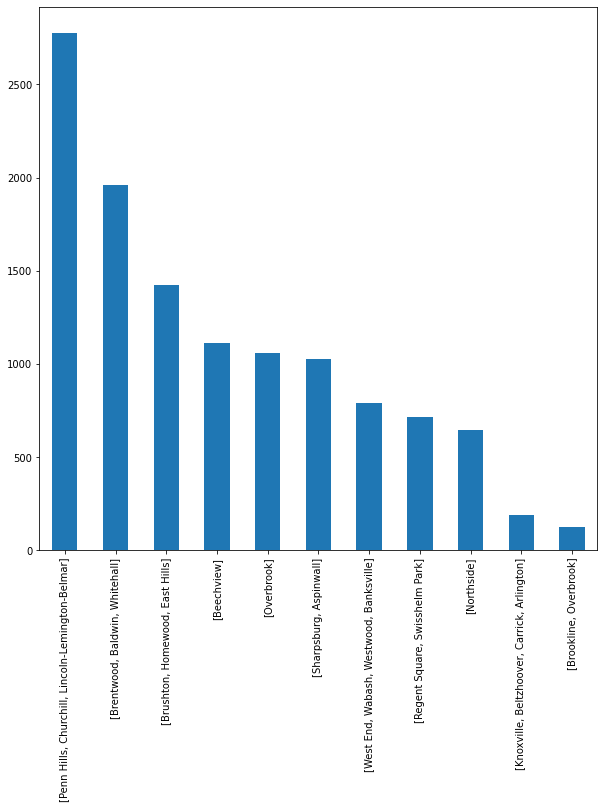

In [9]:
city_dogs_hoods['Neighborhood'].value_counts().plot.bar(figsize=(10,10))

### Conclusion 
The neighborhoods with the most dogs within Pittsburgh are **Penn Hills**, **Chuchill**, and **Lincoln-Lemington-Belmar** with 2778 licensed dogs, followed by **Brentwood**, **Baldwin**, and **Whitehall** with 1960. If you want your dog to be super popular and have lots of friends, these would be the best neighborhoods to choose!

## Submetric: Walkability of Neighborhoods

Walkability in urban planning/design refers to how suited to or adapted for walking an area is. In this case, the data set covers census tract walkability scores from 2014. Just for reference, a census tract is a geographic region defined for the purpose of taking a census. However, there are multiple census tracts per neighborhood within the city of Pittsburgh, so we must keep that in mind for later on. The scores range from 0-100, 0 being he least and 100 being the most walkable. Locations closer to the city tend to have a higher walkability score than those farther away. The average walkability score of the city of Pittsburgh is 62 which is higher than most major cities in the United States. Since our overall metric was what neighborhood would best be for owning a dog in we figured that more walkable neighborhoods would be better to own dogs in.
### Code and Data

After importing pandas, I created dataframes from the walkability score data sheet as well as the census tract data sheet. The walkability score data sheet only had census tract numbers associated to it, so I had use the census tract datasheet to link census areas with neighborhoods. I decided to add an extra column that would later be filled in with the neighborhood name.

In [1]:
import pandas as pd
walk = pd.read_csv("walkscorect.xls-walk-score-by-ct.csv")
censusTractData = pd.read_csv("9756af5f-3320-4601-84e2-347d64071e25.csv")
walk["hood"] = pd.NaT #Create a column of empty "hood values"

Just to show what that looks like:

In [2]:
walk.head()

,Census Tract,Walk Score,hood
0,10300,82,NaT
1,20100,100,NaT
2,20300,83,NaT
3,30500,77,NaT
4,40200,71,NaT


I then had to iterate through each of the rows, read the census tract number, and find it's corrosponding neighborhood in the census tract data sheet. I ran into a problem where some census tracts referred to areas outside of the city. These data points would return empty dataframes which is why I impleteted the error check. If the nieghborhood did not exist within the city, I just set the neighborhood to "N/A."

In [3]:
for i in range(0,len(walk.index)):
    censusTract = walk.iat[i,0] #get census tract of column
    neighborhood = censusTractData.loc[censusTractData['tractce10'] == censusTract] #Get the neighborhood name from the census tract corrosponding to it
    try: #Sometimes the dataframe would be empty since census tracts do not exist in the city of Pittsburgh (Not in census tract data) Therefore we have to error check to make sure a value exists, or input a false value otherwise
        hood = neighborhood.iat[0,13] #gets the nieghborhood name
    except:
        hood = "N/A" #Sets to N/A if cannot find a value at 0,13 in the dataframe
    walk.loc[i, 'hood'] = hood #sets the column "hood" as the neighborhood name

What the walk dataframe looks like after adding the neighborhood:

In [4]:
walk.head()

,Census Tract,Walk Score,hood
0,10300,82,Bluff
1,20100,100,Central Business District
2,20300,83,Strip District
3,30500,77,Crawford-Roberts
4,40200,71,West Oakland


Remember how there were multiple census districts per neighborhood? I had to average the walk score of the census tracts within a nieghborhood to find the overall walkabiity score of the neighborhood. I used pandas aggregate function to do this effeciently and grouped together multiple census tracts under one neighborhood name. I then removed the census tract number since it becomes innacurate and is not needed for reading/analyzing the data.

In [5]:
aggregation_functions = {'Census Tract': 'first', 'Walk Score': 'mean', 'hood': 'first'} #Determines how to aggregate the data frame
df_new = walk.groupby(walk['hood']).aggregate(aggregation_functions) #There are multiple census tracts per neighborhood - this combines all of them into one walkability score for the entire neighborhood
del df_new["Census Tract"] #Removes the Census Tract since we do not need it. Just the neighborhood name
df_new = df_new[df_new["hood"].str.contains("N/A") == False] #Removes N/A data value from the data frame

Now that the data is cleaned up. We can analyze it.

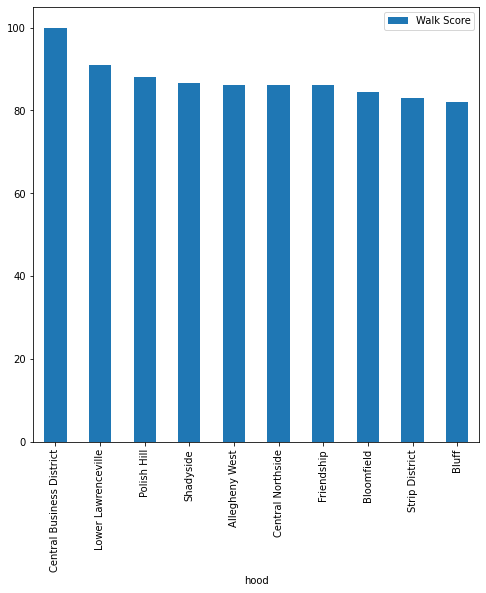

In [6]:
df_new.nlargest(10, "Walk Score").plot.bar(rot=90,figsize =(8,8)) #Plots the 10 highest neighborhoods in walkability scores

In [7]:
df_new.nlargest(10, "Walk Score")

,Walk Score,hood
hood,,
Central Business District,100.0,Central Business District
Lower Lawrenceville,91.0,Lower Lawrenceville
Polish Hill,88.0,Polish Hill
Shadyside,86.6,Shadyside
Allegheny West,86.0,Allegheny West
Central Northside,86.0,Central Northside
Friendship,86.0,Friendship
Bloomfield,84.4,Bloomfield
Strip District,83.0,Strip District


From the data above we can conclude that the top three most walkable neighborhoods in Pittsburgh are the Central Business District, Lower Lawrenceville, and Polish Hill. You can see where these three neighborhoods' walkability scores lie in comparison to the other seven neighborhoods that are part of the top 10 most walkable neighborhoods in Pittsburgh.

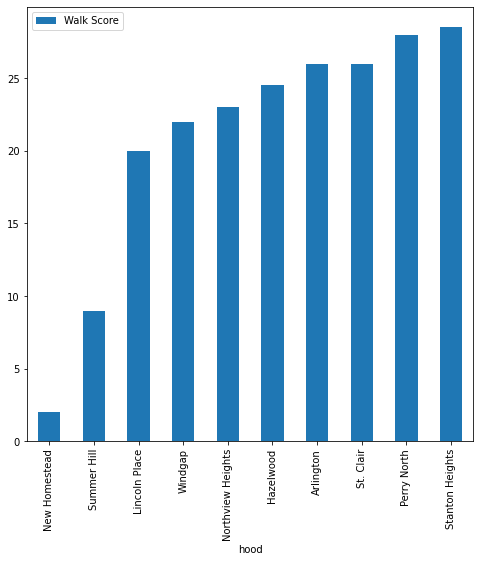

In [8]:
df_new.nsmallest(10, "Walk Score").plot.bar(rot=90,figsize =(8,8)) #Plots the 10 highest neighborhoods in walkability scores

In [9]:
df_new.nsmallest(10, "Walk Score")

,Walk Score,hood
hood,,
New Homestead,2.0,New Homestead
Summer Hill,9.0,Summer Hill
Lincoln Place,20.0,Lincoln Place
Windgap,22.0,Windgap
Northview Heights,23.0,Northview Heights
Hazelwood,24.5,Hazelwood
Arlington,26.0,Arlington
St. Clair,26.0,St. Clair
Perry North,28.0,Perry North


From the data above we can conclude that the top three least walkable neighborhoods in Pittsburgh are New Homestead, Summer Hill, and Lincoln Place. You can see where these three neighborhoods' walkability scores lie in comparison to the other seven neighborhoods that are part of the top 10 least walkable neighborhoods in Pittsburgh.

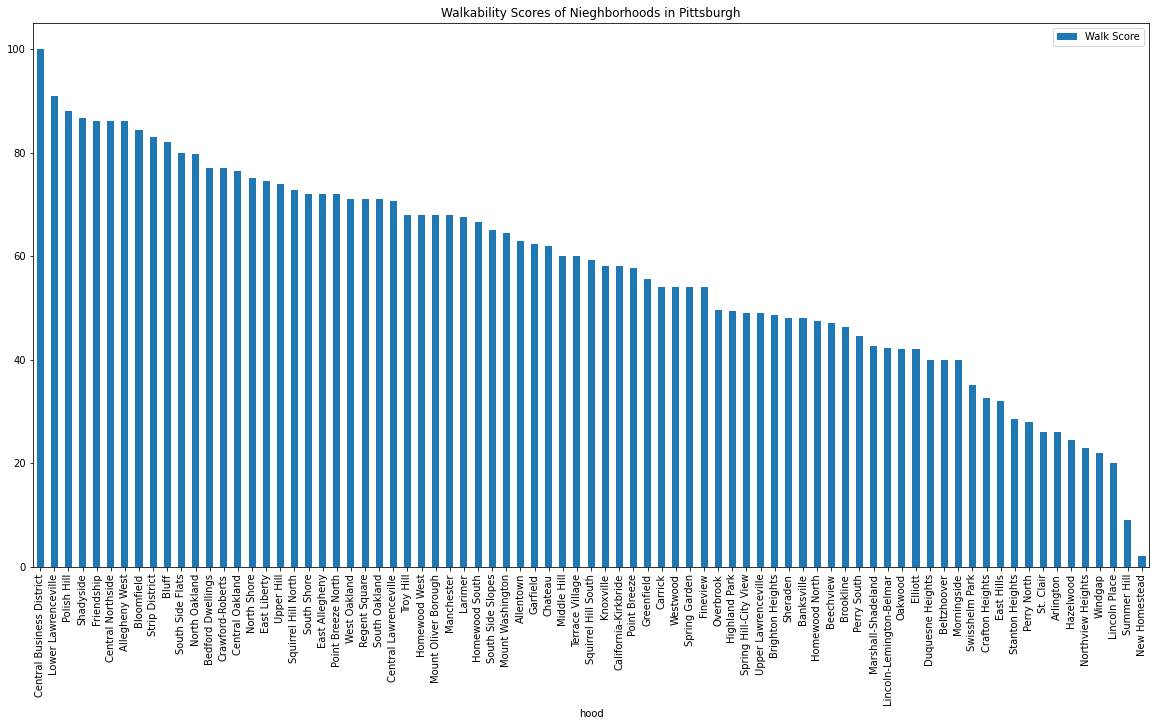

In [10]:
df_new.sort_values(["Walk Score"],ascending=False).plot.bar(rot=90, figsize=(20,10), title = "Walkability Scores of Nieghborhoods in Pittsburgh")

I decided to add a large bar graph that contains all the neighborhoods and their walk scores, just to have a visual of all the neighborhoods in one graph.

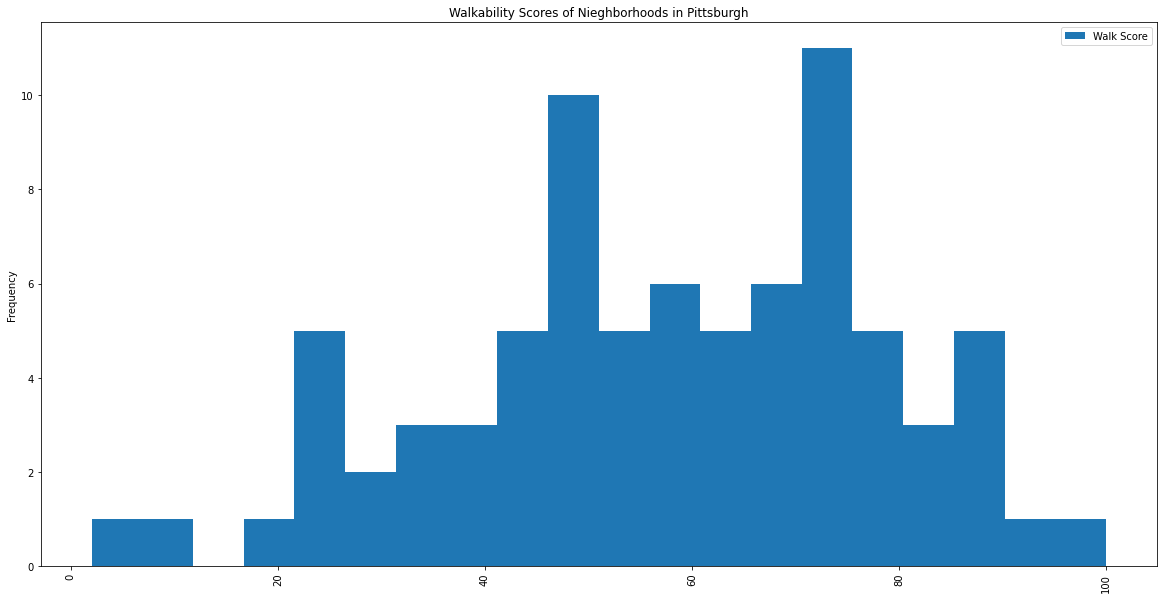

In [11]:
df_new.sort_values(["Walk Score"],ascending=True).plot.hist(rot=90, figsize=(20,10), title = "Walkability Scores of Nieghborhoods in Pittsburgh",bins=20)

In [12]:
df_new["Walk Score"].mean()

57.346413502109684

In this case we can observe that a lot of neighborhoods in Pittsburgh lie within the 40-80 walkability score range. The average walkability score of neighborhoods in Pittsburgh according to our data is 57.3. This value is 5 units off of the reported value (63) which means the 2014 walkability score data is fairly accurate to more recent data.

### Conclusion

**Central Business District, Lower Lawrenceville, and Polish Hill are the most walkable neighborhoods in Pittsburgh** After looking at all the data we can determine the best neighborhoods in terms of walkability. Central Business Distric, Lower Lawrenceville, and Polish Hill were the winners by this metric. These neighborhoods have walkability scores of **100, 91, and 88** respectively. After looking at this data we can also conclude that you should stay away from any of the neighborhoods lower than a walkability score of 30.

## Final Analysis

Taking each member's submetrics into account, and evaluating all of the graphs, we have come to the conclusion that the best neighborhood in Pittsburgh is **Beechview.** There was unfortunately no neighborhood that was ranked very highly by the standards of all three submetrics, but that is to be expected when analyzing different data and applying it to one location. But even though Beechwood was not the highest for every metric, considering its placement within each dataset compared to that of others, it's the optimal choice for a neighborhood that has a good standing for all three submetrics. We were able to come to this conclusion by first considering which submetrics should have more weight in the decision. We decided that the number of parks and amount of dogs in a neighborhood should hold more weight compared to walkability, and found that when comparing these two, Beechview has a decently high standing for both of these submetrics, with 8 parks and 1115 dogs. We then checked Beechview's standing in the walkability submetric, and found that the neighborhood has a walkability score of 37. This is below average, however it doesn't fall into the standard of a "bad" walkability score. Although not optimal, considering the other two submetrics and how there were no other neighborhoods comparably as good, we opted for choosing Beechview as the best neighborhood in Pittsburgh to own a dog, AKA the best neighborhood in Pittsburgh!

<img src="https://i.kym-cdn.com/photos/images/newsfeed/002/189/898/270.jpg" width=340 height=331/>

Thank you for listening/reading! Please double tap if you'd scrunkly the when. He's happy because he lives in Beechview :)